In [12]:
import pandas as pd

In [13]:
!ls

2017 NEISS Data Highlights.pdf        neiss2017.tsv
2018-NEISS-CPSC-only-CodingManual.pdf neiss_fmt.txt
2018ComparabilityTable.pdf            race.csv
Untitled.ipynb                        silva_classwork06.ipynb


In [14]:
#open file without using panda
!head -n 5 neiss2017.tsv

In [16]:
# Put Cursos inside of read_csv,
# hold shit, press tab (or tap it a few times)
df = pd.read_csv('neiss2017.tsv', sep='\t', encoding='latin-1')
df.head()

/Users/nexojornal/.pyenv/versions/3.8.10/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (0,2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
0,170100733,01/01/2017,21,1,1.0,NaN,75.0,62.0,NaN,1.0,1.0,0.0,1207.0,0.0,21YOM WAS BOXING WITH FRIEND WHILE DRINKING AN...,. BAC= 93.6 DX HEAD INJURY AND ALCOHOL INTOXIC...,S,46.0,77.6641
1,170100734,01/01/2017,71,1,1.0,NaN,31.0,53.0,NaN,1.0,5.0,0.0,1807.0,0.0,71YOM FELL ON FLOOR IN BATHROOM. DX RIB CONTUSION,NaN,S,46.0,77.6641
2,170100735,01/01/2017,16,1,1.0,NaN,33.0,51.0,NaN,1.0,1.0,0.0,676.0,342.0,16YOM TRIPPED OVER A RUG AND FELL INTO A BURNI...,DX BURNS INVOLVING LESS THAN 10% OF BODY SURFA...,S,46.0,77.6641
3,170100737,01/01/2017,55,2,1.0,NaN,75.0,62.0,NaN,1.0,1.0,0.0,620.0,0.0,55YOF WAS STANDING ON A STEP STOOL AND LOST FO...,HEAD INJURY,S,46.0,77.6641
4,170100740,01/01/2017,86,2,1.0,NaN,79.0,58.0,NaN,1.0,1.0,0.0,1646.0,4056.0,86YOF GOT TANGLED IN COAT AND FELL BACKWARD ST...,"H. DX HEMATOMA OF SOFT TISSUE, LEFT FLANK",S,46.0,77.6641


In [17]:
pd.__version__

'1.2.5'

In [18]:
 df.dtypes

CPSC_Case_Number     object
Treatment_Date       object
Age                  object
Sex                   int64
Race                float64
Other_Race           object
Body_Part           float64
Diagnosis           float64
Other_Diagnosis      object
Disposition         float64
Location            float64
Fire_Involvement    float64
Product_1           float64
Product_2           float64
Narrative_1          object
Narrative_2          object
Stratum              object
PSU                 float64
Weight              float64
dtype: object

In [19]:
#what are some questions we can ask about age????
df[df.Age == 'C']

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
160878,;CONCUSSION,NaN,C,8,4.757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df.shape

(386907, 19)

In [21]:
#drop rows with missing data
df.dropna().shape

(2992, 19)

In [35]:
#only drop 'Treatment_Date', 
#let's permantently change our dataframe to get
# rid of every row where treatment_dat is missing
df = df.dropna(subset=['Treatment_Date'])
df.head(2)

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
0,170100733,01/01/2017,21,1,1.0,NaN,75.0,62.0,NaN,1.0,1.0,0.0,1207.0,0.0,21YOM WAS BOXING WITH FRIEND WHILE DRINKING AN...,. BAC= 93.6 DX HEAD INJURY AND ALCOHOL INTOXIC...,S,46.0,77.6641
1,170100734,01/01/2017,71,1,1.0,NaN,31.0,53.0,NaN,1.0,5.0,0.0,1807.0,0.0,71YOM FELL ON FLOOR IN BATHROOM. DX RIB CONTUSION,NaN,S,46.0,77.6641


In [36]:
#do we still have that bad age row?
df[df.Age == 'C']

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight


In [37]:
df.Age.meadian()

AttributeError: 'Series' object has no attribute 'meadian'

In [38]:
df.dtypes

CPSC_Case_Number     object
Treatment_Date       object
Age                  object
Sex                   int64
Race                float64
Other_Race           object
Body_Part           float64
Diagnosis           float64
Other_Diagnosis      object
Disposition         float64
Location            float64
Fire_Involvement    float64
Product_1           float64
Product_2           float64
Narrative_1          object
Narrative_2          object
Stratum              object
PSU                 float64
Weight              float64
dtype: object

In [41]:
#salvando permanentemente a coluna 'age' como número
df.Age = df.Age.astype(int)

/Users/nexojornal/.pyenv/versions/3.8.10/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [43]:
#revendo os tipos de dados dentro do data_set
df.dtypes

CPSC_Case_Number     object
Treatment_Date       object
Age                   int64
Sex                   int64
Race                float64
Other_Race           object
Body_Part           float64
Diagnosis           float64
Other_Diagnosis      object
Disposition         float64
Location            float64
Fire_Involvement    float64
Product_1           float64
Product_2           float64
Narrative_1          object
Narrative_2          object
Stratum              object
PSU                 float64
Weight              float64
dtype: object

In [44]:
df.head(2)

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
0,170100733,01/01/2017,21,1,1.0,NaN,75.0,62.0,NaN,1.0,1.0,0.0,1207.0,0.0,21YOM WAS BOXING WITH FRIEND WHILE DRINKING AN...,. BAC= 93.6 DX HEAD INJURY AND ALCOHOL INTOXIC...,S,46.0,77.6641
1,170100734,01/01/2017,71,1,1.0,NaN,31.0,53.0,NaN,1.0,5.0,0.0,1807.0,0.0,71YOM FELL ON FLOOR IN BATHROOM. DX RIB CONTUSION,NaN,S,46.0,77.6641


In [45]:
df.Age.mean()

44.36845900554657

In [46]:
df.Age.describe()

count    386906.000000
mean         44.368459
std          49.560967
min           0.000000
25%          12.000000
50%          29.000000
75%          60.000000
max         223.000000
Name: Age, dtype: float64

In [47]:
df[df.Age > 200] 

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
72,170104133,01/01/2017,212,1,0.0,NaN,75.0,62.0,NaN,1.0,1.0,0.0,671.0,0.0,12 MONTH OLD MALE CLIMBED UP ONTO ROCKING CHAR...,TH CLOSED HEAD INJ,V,38.0,16.1828
116,170106101,01/01/2017,208,2,3.0,UNKNOWN,75.0,53.0,NaN,1.0,1.0,0.0,4076.0,1807.0,8 MOF FELL OFF BED TO FLOOR. DX SCALP CONTUSION,NaN,C,31.0,4.7570
125,170106113,01/01/2017,218,2,1.0,NaN,83.0,57.0,NaN,1.0,1.0,0.0,1545.0,0.0,18 MOF FELL FROM CRIB. DX FOOT FX,NaN,C,31.0,4.7570
126,170106117,01/01/2017,218,1,1.0,NaN,32.0,55.0,NaN,1.0,5.0,0.0,1645.0,0.0,18 MOM - PT EATING SPAGHETTI AT A RESTAURANT A...,VE AND HEARD A POP. DX NURSEMAIDS ELBOW,C,31.0,4.7570
129,170106120,01/01/2017,204,2,3.0,HISPANIC,75.0,53.0,NaN,1.0,1.0,0.0,4076.0,1807.0,4 MOF FELL OFF BED TO FLOOR. DX SCALP CONTUSION,NaN,C,31.0,4.7570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386890,180309750,12/18/2017,212,2,2.0,NaN,75.0,62.0,NaN,4.0,1.0,0.0,661.0,0.0,12MO F FELL OFF BUNK BED;DX CLOSED HEAD INJURY...,NaN,C,20.0,4.7570
386892,180309752,12/19/2017,218,1,1.0,NaN,85.0,68.0,NaN,4.0,1.0,0.0,1913.0,0.0,18MO M WITH REACTION TO *** LOTION; DX ALLERGI...,NaN,C,20.0,4.7570
386903,180309763,12/31/2017,212,2,2.0,NaN,92.0,50.0,NaN,4.0,1.0,0.0,4076.0,0.0,"12MO F PT LYING IN BED, THERE WAS A DRIVE-BY S...",UGH WALL AND HIT PT IN BED; DX AMPUTATED THUMB,C,20.0,4.7570
386904,180309764,12/31/2017,218,1,1.0,NaN,81.0,57.0,NaN,4.0,1.0,0.0,1395.0,0.0,18MO M SLIPPED ON TOY;DX FEMUR FX,NaN,C,20.0,4.7570


In [48]:
  df[df.Age > 200].shape 

(22818, 19)

<AxesSubplot:>

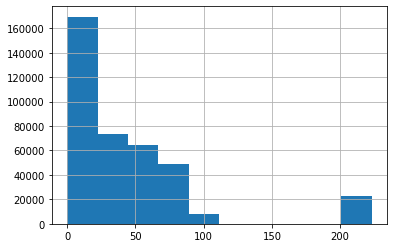

In [49]:
df.Age.hist()

In [53]:
# Removing everyone who is 200 years ol or more  
# önly keeping people who are under 200 years old"
df = df[df.Age < 200]
df.head()

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
0,170100733,01/01/2017,21,1,1.0,NaN,75.0,62.0,NaN,1.0,1.0,0.0,1207.0,0.0,21YOM WAS BOXING WITH FRIEND WHILE DRINKING AN...,. BAC= 93.6 DX HEAD INJURY AND ALCOHOL INTOXIC...,S,46.0,77.6641
1,170100734,01/01/2017,71,1,1.0,NaN,31.0,53.0,NaN,1.0,5.0,0.0,1807.0,0.0,71YOM FELL ON FLOOR IN BATHROOM. DX RIB CONTUSION,NaN,S,46.0,77.6641
2,170100735,01/01/2017,16,1,1.0,NaN,33.0,51.0,NaN,1.0,1.0,0.0,676.0,342.0,16YOM TRIPPED OVER A RUG AND FELL INTO A BURNI...,DX BURNS INVOLVING LESS THAN 10% OF BODY SURFA...,S,46.0,77.6641
3,170100737,01/01/2017,55,2,1.0,NaN,75.0,62.0,NaN,1.0,1.0,0.0,620.0,0.0,55YOF WAS STANDING ON A STEP STOOL AND LOST FO...,HEAD INJURY,S,46.0,77.6641
4,170100740,01/01/2017,86,2,1.0,NaN,79.0,58.0,NaN,1.0,1.0,0.0,1646.0,4056.0,86YOF GOT TANGLED IN COAT AND FELL BACKWARD ST...,"H. DX HEMATOMA OF SOFT TISSUE, LEFT FLANK",S,46.0,77.6641


In [54]:
df.Sex.describe()

count    364088.000000
mean          1.461136
std           0.498527
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           2.000000
Name: Sex, dtype: float64

In [56]:
#Sex :
#Male : 1
#Female : 2
#Not recorded: 0 

df.groupby('Sex').Age.median()

Sex
0    12
1    21
2    32
Name: Age, dtype: int64

In [57]:
#If you just want to replace one thing, you can do this, but......!
df.Sex.replace(1, 'M')

0         M
1         M
2         M
3         2
4         2
         ..
386899    2
386900    2
386901    M
386902    2
386906    2
Name: Sex, Length: 364088, dtype: object

In [62]:
import numpy as np

# We need to pull in Nan from np
# and replace the Sex column with our updated Sex column
df.Sex = df.Sex.replace({
    1: 'M',
    2: 'F',
    0:  np.nan
})

In [63]:
df.head(2)

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
0,170100733,01/01/2017,21,M,1.0,NaN,75.0,62.0,NaN,1.0,1.0,0.0,1207.0,0.0,21YOM WAS BOXING WITH FRIEND WHILE DRINKING AN...,. BAC= 93.6 DX HEAD INJURY AND ALCOHOL INTOXIC...,S,46.0,77.6641
1,170100734,01/01/2017,71,M,1.0,NaN,31.0,53.0,NaN,1.0,5.0,0.0,1807.0,0.0,71YOM FELL ON FLOOR IN BATHROOM. DX RIB CONTUSION,NaN,S,46.0,77.6641


In [64]:
df.groupby('Sex').Age.median()

Sex
F    32
M    21
Name: Age, dtype: int64

In [65]:
df.Race

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
386899    1.0
386900    1.0
386901    2.0
386902    1.0
386906    1.0
Name: Race, Length: 364088, dtype: float64

In [66]:
#contar as categorias
#olhar no data dictonary
df.Race.value_counts()

1.0    151268
0.0    136992
2.0     51135
3.0     18907
4.0      4223
5.0      1175
6.0       388
Name: Race, dtype: int64

In [77]:
#combinar com outro dataframe
#tab is our separator! not a comma!
df_race = pd.read_csv("race.csv", sep='\t')
df_race

,key,code,value
0,RACE,0,N.S.
1,RACE,1,WHITE
2,RACE,2,BLACK/AFRICAN AMERICAN
3,RACE,3,OTHER
4,RACE,4,ASIAN
5,RACE,5,AMERICAN INDIAN/ALASKA NATIVE
6,RACE,6,NATIVE HAWAIIAN/PACIFIC ISLANDER


In [78]:
df.head(2)

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
0,170100733,01/01/2017,21,M,1.0,NaN,75.0,62.0,NaN,1.0,1.0,0.0,1207.0,0.0,21YOM WAS BOXING WITH FRIEND WHILE DRINKING AN...,. BAC= 93.6 DX HEAD INJURY AND ALCOHOL INTOXIC...,S,46.0,77.6641
1,170100734,01/01/2017,71,M,1.0,NaN,31.0,53.0,NaN,1.0,5.0,0.0,1807.0,0.0,71YOM FELL ON FLOOR IN BATHROOM. DX RIB CONTUSION,NaN,S,46.0,77.6641


In [80]:
#Add all of the columns from df_race to df
#matching them up based on Race and code
df = df.merge(df_race.add_prefix('race_'), left_on='Race', right_on='race_code')

In [83]:
df = df.drop(columns=['Race'])
df.head()

KeyError: "['Race'] not found in axis"

In [84]:
df.head()

,CPSC_Case_Number,Treatment_Date,Age,Sex,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,...,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight,race_key,race_code,race_value
0,170100733,01/01/2017,21,M,NaN,75.0,62.0,NaN,1.0,1.0,...,1207.0,0.0,21YOM WAS BOXING WITH FRIEND WHILE DRINKING AN...,. BAC= 93.6 DX HEAD INJURY AND ALCOHOL INTOXIC...,S,46.0,77.6641,RACE,1,WHITE
1,170100734,01/01/2017,71,M,NaN,31.0,53.0,NaN,1.0,5.0,...,1807.0,0.0,71YOM FELL ON FLOOR IN BATHROOM. DX RIB CONTUSION,NaN,S,46.0,77.6641,RACE,1,WHITE
2,170100735,01/01/2017,16,M,NaN,33.0,51.0,NaN,1.0,1.0,...,676.0,342.0,16YOM TRIPPED OVER A RUG AND FELL INTO A BURNI...,DX BURNS INVOLVING LESS THAN 10% OF BODY SURFA...,S,46.0,77.6641,RACE,1,WHITE
3,170100737,01/01/2017,55,F,NaN,75.0,62.0,NaN,1.0,1.0,...,620.0,0.0,55YOF WAS STANDING ON A STEP STOOL AND LOST FO...,HEAD INJURY,S,46.0,77.6641,RACE,1,WHITE
4,170100740,01/01/2017,86,F,NaN,79.0,58.0,NaN,1.0,1.0,...,1646.0,4056.0,86YOF GOT TANGLED IN COAT AND FELL BACKWARD ST...,"H. DX HEMATOMA OF SOFT TISSUE, LEFT FLANK",S,46.0,77.6641,RACE,1,WHITE


In [85]:
df[['Age', 'Sex']].head()

,Age,Sex
0,21,M
1,71,M
2,16,M
3,55,F
4,86,F


In [86]:
df.head()

,CPSC_Case_Number,Treatment_Date,Age,Sex,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,...,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight,race_key,race_code,race_value
0,170100733,01/01/2017,21,M,NaN,75.0,62.0,NaN,1.0,1.0,...,1207.0,0.0,21YOM WAS BOXING WITH FRIEND WHILE DRINKING AN...,. BAC= 93.6 DX HEAD INJURY AND ALCOHOL INTOXIC...,S,46.0,77.6641,RACE,1,WHITE
1,170100734,01/01/2017,71,M,NaN,31.0,53.0,NaN,1.0,5.0,...,1807.0,0.0,71YOM FELL ON FLOOR IN BATHROOM. DX RIB CONTUSION,NaN,S,46.0,77.6641,RACE,1,WHITE
2,170100735,01/01/2017,16,M,NaN,33.0,51.0,NaN,1.0,1.0,...,676.0,342.0,16YOM TRIPPED OVER A RUG AND FELL INTO A BURNI...,DX BURNS INVOLVING LESS THAN 10% OF BODY SURFA...,S,46.0,77.6641,RACE,1,WHITE
3,170100737,01/01/2017,55,F,NaN,75.0,62.0,NaN,1.0,1.0,...,620.0,0.0,55YOF WAS STANDING ON A STEP STOOL AND LOST FO...,HEAD INJURY,S,46.0,77.6641,RACE,1,WHITE
4,170100740,01/01/2017,86,F,NaN,79.0,58.0,NaN,1.0,1.0,...,1646.0,4056.0,86YOF GOT TANGLED IN COAT AND FELL BACKWARD ST...,"H. DX HEMATOMA OF SOFT TISSUE, LEFT FLANK",S,46.0,77.6641,RACE,1,WHITE


In [89]:
df = df.drop(columns=['race_key', 'race_code'])

KeyError: "['race_key' 'race_code'] not found in axis"

In [90]:
df.head()

,CPSC_Case_Number,Treatment_Date,Age,Sex,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight,race_value
0,170100733,01/01/2017,21,M,NaN,75.0,62.0,NaN,1.0,1.0,0.0,1207.0,0.0,21YOM WAS BOXING WITH FRIEND WHILE DRINKING AN...,. BAC= 93.6 DX HEAD INJURY AND ALCOHOL INTOXIC...,S,46.0,77.6641,WHITE
1,170100734,01/01/2017,71,M,NaN,31.0,53.0,NaN,1.0,5.0,0.0,1807.0,0.0,71YOM FELL ON FLOOR IN BATHROOM. DX RIB CONTUSION,NaN,S,46.0,77.6641,WHITE
2,170100735,01/01/2017,16,M,NaN,33.0,51.0,NaN,1.0,1.0,0.0,676.0,342.0,16YOM TRIPPED OVER A RUG AND FELL INTO A BURNI...,DX BURNS INVOLVING LESS THAN 10% OF BODY SURFA...,S,46.0,77.6641,WHITE
3,170100737,01/01/2017,55,F,NaN,75.0,62.0,NaN,1.0,1.0,0.0,620.0,0.0,55YOF WAS STANDING ON A STEP STOOL AND LOST FO...,HEAD INJURY,S,46.0,77.6641,WHITE
4,170100740,01/01/2017,86,F,NaN,79.0,58.0,NaN,1.0,1.0,0.0,1646.0,4056.0,86YOF GOT TANGLED IN COAT AND FELL BACKWARD ST...,"H. DX HEMATOMA OF SOFT TISSUE, LEFT FLANK",S,46.0,77.6641,WHITE


In [91]:
#shift + tab to see how it works
#oh these docs were awful, just listen
#to what I say

df = df.rename(columns={
    'race_value': 'race'
})
df

,CPSC_Case_Number,Treatment_Date,Age,Sex,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight,race
0,170100733,01/01/2017,21,M,NaN,75.0,62.0,NaN,1.0,1.0,0.0,1207.0,0.0,21YOM WAS BOXING WITH FRIEND WHILE DRINKING AN...,. BAC= 93.6 DX HEAD INJURY AND ALCOHOL INTOXIC...,S,46.0,77.6641,WHITE
1,170100734,01/01/2017,71,M,NaN,31.0,53.0,NaN,1.0,5.0,0.0,1807.0,0.0,71YOM FELL ON FLOOR IN BATHROOM. DX RIB CONTUSION,NaN,S,46.0,77.6641,WHITE
2,170100735,01/01/2017,16,M,NaN,33.0,51.0,NaN,1.0,1.0,0.0,676.0,342.0,16YOM TRIPPED OVER A RUG AND FELL INTO A BURNI...,DX BURNS INVOLVING LESS THAN 10% OF BODY SURFA...,S,46.0,77.6641,WHITE
3,170100737,01/01/2017,55,F,NaN,75.0,62.0,NaN,1.0,1.0,0.0,620.0,0.0,55YOF WAS STANDING ON A STEP STOOL AND LOST FO...,HEAD INJURY,S,46.0,77.6641,WHITE
4,170100740,01/01/2017,86,F,NaN,79.0,58.0,NaN,1.0,1.0,0.0,1646.0,4056.0,86YOF GOT TANGLED IN COAT AND FELL BACKWARD ST...,"H. DX HEMATOMA OF SOFT TISSUE, LEFT FLANK",S,46.0,77.6641,WHITE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364083,180107683,12/29/2017,43,M,NaN,31.0,71.0,PAIN,1.0,9.0,0.0,3299.0,0.0,43YOM PAIN TO CHEST AND LETHARGY WHEN WORKING ...,/ PAIN CHEST,L,42.0,76.8114,NATIVE HAWAIIAN/PACIFIC ISLANDER
364084,180116697,12/13/2017,56,F,NaN,75.0,62.0,NaN,1.0,1.0,0.0,612.0,4057.0,56YOF S/P FALL COVERED CORD W/RUG TRIPPED HIT ...,"DX:CERVICAL STRAIN,CHI,CONTS CHEST WALL,DEGENE...",V,40.0,16.9919,NATIVE HAWAIIAN/PACIFIC ISLANDER
364085,180142065,12/25/2017,28,M,NaN,79.0,64.0,NaN,1.0,0.0,0.0,3265.0,1411.0,28 YOM DEAD LIFTED 90LB WEIGHTS AND CHAIN SAWS...,DX: R SIDED PARALUMBAR STRAIN.,V,93.0,16.9919,NATIVE HAWAIIAN/PACIFIC ISLANDER
364086,180150164,12/25/2017,2,M,NaN,76.0,59.0,NaN,1.0,0.0,0.0,4057.0,0.0,2 YOM RAN INTO A TABLE & HIT HIS FOREHEAD- LAC...,DX: FOREHEAD LACERATION,C,90.0,4.7570,NATIVE HAWAIIAN/PACIFIC ISLANDER


In [92]:
df.race.value_counts()

WHITE                               151268
N.S.                                136992
BLACK/AFRICAN AMERICAN               51135
OTHER                                18907
ASIAN                                 4223
AMERICAN INDIAN/ALASKA NATIVE         1175
NATIVE HAWAIIAN/PACIFIC ISLANDER       388
Name: race, dtype: int64

In [94]:
#Replace N.S with np.nan
# Why not df.race.replace("N.S" , "NaN")
df.race = df.race.replace('N.S' , np.nan)
df.head (2)

,CPSC_Case_Number,Treatment_Date,Age,Sex,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight,race
0,170100733,01/01/2017,21,M,NaN,75.0,62.0,NaN,1.0,1.0,0.0,1207.0,0.0,21YOM WAS BOXING WITH FRIEND WHILE DRINKING AN...,. BAC= 93.6 DX HEAD INJURY AND ALCOHOL INTOXIC...,S,46.0,77.6641,WHITE
1,170100734,01/01/2017,71,M,NaN,31.0,53.0,NaN,1.0,5.0,0.0,1807.0,0.0,71YOM FELL ON FLOOR IN BATHROOM. DX RIB CONTUSION,NaN,S,46.0,77.6641,WHITE


In [95]:
df.Narrative_1.str.contains("ALCOHOL", case=False)

0         False
1         False
2         False
3         False
4         False
          ...  
364083    False
364084    False
364085    False
364086    False
364087    False
Name: Narrative_1, Length: 364088, dtype: bool

In [96]:
df.Narrative_1.str.contains("ALCOHOL", case=False).value_counts()

False    363515
True        573
Name: Narrative_1, dtype: int64

In [97]:
df[df.Narrative_1.str.contains("ALCOHOL", case=False)|
   df.Narrative_1.str.contains("DRINK", case=False)  
  ]

,CPSC_Case_Number,Treatment_Date,Age,Sex,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight,race
518,170116625,01/05/2017,53,F,NaN,76.0,59.0,NaN,1.0,1.0,0.0,1884.0,1807.0,"53 YOF INJURED FOREHEAD,DRINKING ALCOHOL,FELL ...","AGAINST WALL,FLOOR AT HOME. DX-FOREHEAD LACERA...",M,78.0,87.0904,WHITE
944,170120923,01/02/2017,28,M,NaN,75.0,59.0,NaN,1.0,1.0,0.0,214.0,0.0,28YOM DRANK UNKNOWN AMOUNTS OF ALCOHOL FELL HI...,C TO HEAD ETOH IN TOX,S,79.0,77.6641,WHITE
986,170121659,01/01/2017,55,M,NaN,76.0,53.0,NaN,4.0,5.0,0.0,4025.0,0.0,55 YOM FELL OFF OF STOOL AT BAR. DX: FACIAL ...,"LONG TERM USE BLOOD THINNERS, CEREBRAL ARTERY ...",L,5.0,67.2099,WHITE
1143,170123410,01/05/2017,26,M,NaN,75.0,62.0,NaN,1.0,0.0,0.0,1807.0,0.0,26YOM DRINKING ALCOHOL AND HEAVILY INTOXICATED...,TRIKING FACE ON FLOOR LAC L EYEBROW D CLOSED H...,S,28.0,77.6641,WHITE
1383,170124850,01/02/2017,58,M,NaN,76.0,59.0,NaN,1.0,5.0,0.0,1807.0,0.0,58 YO M PT IS ALCOHOL INTOXICATED IN A STORE F...,FACE. DX LACERATION RT EYEBROW 3CM,L,89.0,67.2099,WHITE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363211,170816874,07/05/2017,40,M,NaN,37.0,64.0,NaN,1.0,1.0,0.0,1807.0,0.0,40 YO M PT IS ALCOHOL INTOXICATED FELL ONTO FL...,ANKLE PAINFUL DX SPRAIN RT ANKLE,L,89.0,67.2099,AMERICAN INDIAN/ALASKA NATIVE
363228,170838792,07/06/2017,45,M,NaN,75.0,62.0,NaN,1.0,1.0,0.0,1807.0,0.0,45 YO M PT WAS AT HIS FRIENDS HOUSE DRINKING A...,URE FELL HITTING HEAD ON FLOOR DX CHI,L,89.0,67.2099,AMERICAN INDIAN/ALASKA NATIVE
363240,170857680,07/16/2017,51,F,NaN,31.0,57.0,NaN,5.0,5.0,0.0,1817.0,0.0,51 YO F PT IS ALCOHOL INTOXICATED BAL 100 FELL...,HOTEL LANDING ON GROUND CHEST PAIN DX FRACTURE...,L,89.0,67.2099,AMERICAN INDIAN/ALASKA NATIVE
363332,170928078,08/05/2017,28,M,NaN,82.0,59.0,NaN,1.0,4.0,0.0,5040.0,0.0,28 YO M PT WAS RIDING BICYCLE WHILE ALCOHOL IN...,IN ROAD FELL ONTO RT HAND DX LACERATION RT HAN...,L,89.0,67.2099,AMERICAN INDIAN/ALASKA NATIVE
